<a href="https://colab.research.google.com/github/dongjun-kor/Python/blob/main/%EC%9C%A0%ED%9A%A8%ED%8A%B9%ED%97%88%20%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8(BERT-base%3Duncased).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Huggingface 소개

![대체 텍스트](https://i.imgur.com/6DM516z.png)  
![대체 텍스트](https://i.imgur.com/g6R67h4.png)    
https://huggingface.co/transformers/ 

HuggingFace는 자연어 처리 인공지능 모델에서, BERT 모델 같은 트랜스포머 모델들을 쉽게 다룰 수 있게 해주는 패키지입니다.  
기본적으로 pytorch 기반으로 만들어져 있지만, 텐서플로우 2.0에서도 본 패키지를 사용 가능합니다.  
텐서플로우 2.0은 기존 케라스를 포함하고 있기 때문에, 기존 텐서플로우나 케라스에 익숙하신 분들이 쉽게 사용할 수 있습니다.  
텐서플로우 2.0 기반의 huggingface 사용 방법을 네이버 영화 긍부정 분석을 실습하면서 배워 보도록 하겠습니다.

#목차
이번 실습은 <b>1) 네이버 감성분석 데이터 불러오기 및 전처리 2) BERT 인풋 만들기 3) 버트를 활용한 감성분석 모델 만들기 4) 훈련 및 성능 검증 5) 실제 데이터로 실습하기</b>로 구성되어 있습니다.

#BERT를 활용하여 네이버 감성분석 만들기

## 네이버 감성분석 데이터 불러오기 및 전처리

huggingface 패키지를 Colab에 설치합니다

In [ ]:
!pip install transformers==3.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 1.3 MB 82.2 MB/s 
     |████████████████████████████████| 880 kB 70.3 MB/s 
     |████████████████████████████████| 3.0 MB 73.3 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=c3c2e3a6d45cf6c6a7fe6945e656017bfaabeee89d811bc2e307f2a4612b8681
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


텐서플로우 2와 필요한 모듈들을 임포트합니다.  
최근에 텐서플로우 기본 버전은 2로 바뀌었습니다.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import *
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os

구글 드라이브와 Colab을 연동합니다.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


이번 예제에서 사용할 네이버 영화 감상분석 데이터를 다운로드 합니다

In [ ]:
# 네이버 영화 감성분석 데이터 다운로드
#!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 24.19 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Checking out files: 100% (14737/14737), done.


In [ ]:
#os.listdir('nsmc')

['code',
 'ratings_train.txt',
 '.git',
 'ratings.txt',
 'README.md',
 'raw',
 'ratings_test.txt',
 'synopses.json']

딥러닝 훈련에 사용 할 train 데이터와 test 데이터를 pandas dataframe 형식으로 불러옵니다.

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/분류모델 최종제작.csv",encoding="cp949")

In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
data2=sklearn.utils.shuffle(data) #데이터 셔플

In [ ]:
from sklearn.model_selection import train_test_split #데이터 나누기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data2['대표청구항'],data2['label'],test_size=0.3,random_state=1234) #나눈 데이터

In [ ]:
train=pd.concat([X_train,y_train],axis=1) # 열 병합

In [ ]:
test=pd.concat([X_test,y_test],axis=1) #열 병합

In [ ]:
test

,document,label
0,(Project) The present invention is an amplitud...,0
1,"Devices, systems, and methods pertain to plann...",1
2,A method for learning words for infants and to...,0
3,A method implemented by computer means for det...,0
4,The present invention relates to a process for...,0
...,...,...
10718,A virtual reality motion sickness measuring de...,1
10719,The present invention relates to an intelligen...,0
10720,The present invention relates to a drawing gen...,0
10721,The present invention relates to a power facil...,0


In [ ]:
train = pd.read_csv("/content/gdrive/MyDrive/train.csv",encoding="cp949")
test = pd.read_csv("/content/gdrive/MyDrive/test.csv",encoding="cp949")

#인덱스 초기화

In [ ]:
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)

In [ ]:
#train = pd.read_table("nsmc/"+"ratings_train.txt")
#test = pd.read_table("nsmc/"+"ratings_test.txt")

In [ ]:
data

,document,대표청구항,label
0,An implantable medical device may include a te...,\n 1. An implantable medical device (IMD) comp...,1
1,A system and a method of performing a frameles...,\n 1. A system for frameless image-guided biop...,1
2,An implantable medical device (IMD) adjusts a ...,\n 1. A method comprising:receiving an input a...,1
3,A medical system includes a sensor location mo...,\n 1. A medical system comprising:a sensor loc...,1
4,A binary CDMA image transmission and receiving...,\n 1. A binary CDMA image transmission and rec...,1
...,...,...,...
35736,An imaging method for enhanced visualization o...,\n 1. An imaging method for enhancing a visual...,0
35737,Disclosed herein are systems and processes for...,\n 1. A method for treating a waste stream com...,0
35738,Disclosed are nanotopography-based methods and...,\n 1. A medical device for delivering a drug c...,0
35739,The present invention provides a transdermal d...,\nA transdermal drug delivery system consistin...,0


In [ ]:
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)

In [ ]:
train

,document,label
0,(Project) An information processing program an...,0
1,"In some embodiments, nerves surrounding arteri...",0
2,【Task】Provide a method for continuously record...,1
3,A device and a method are provided for detecti...,1
4,A medical treatment support device capable of ...,1
...,...,...
25013,"[Problem] In the present embodiment, a receivi...",0
25014,"The present invention relates to methods, appa...",0
25015,A method for providing diagnostic test results...,1
25016,The present invention relates to a system for ...,0


In [ ]:
test

,document,label
0,(Project) To provide a coloring composition th...,0
1,Various embodiments provide an automated testi...,1
2,The present invention provides a class of mono...,0
3,The present invention relates to a method for ...,0
4,The Patient Data Management System operates un...,1
...,...,...
10718,An image processing system is provided. The im...,1
10719,(Problems) In digital control of piezoelectric...,0
10720,Epoxy curatives and two-part compositions comp...,0
10721,A pacemaker control system includes a pacemake...,1


## 버트 인풋 만들기

한글 데이터를 분석하려면, 100개가 넘는 언어에 대해 훈련된 버트를 사용해야 합니다.  
multilingual BERT를 사용하도록 하겠습니다.  
모델을 로드하기에 앞서, 토크나이저를 불러오도록 하겠습니다.  
huggingface에서는 아주 쉽게 토크나이저를 불러올 수 있습니다.

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
#tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

버트를 사용하기에 앞서 가장 기초에 속하는 tokenizer 사용 방법에 대해서 잠시 배워보도록 하겠습니다.  
tokenizer.encode => 문장을 버트 모델의 인풋 토큰값으로 바꿔줌  
tokenizer.tokenize => 문장을 토큰화

In [ ]:
#print(tokenizer.encode("보는내내 그대로 들어맞는 예측 카리스마 없는 악역"))

[101, 9356, 11018, 31605, 31605, 110589, 71568, 118913, 11018, 9576, 119281, 9786, 79940, 23811, 40364, 9520, 23160, 102]


In [ ]:
#print(tokenizer.tokenize("보는내내 그대로 들어맞는 예측 카리스마 없는 악역"))

['보', '##는', '##내', '##내', '그대로', '들어', '##맞', '##는', '예', '##측', '카', '##리스', '##마', '없는', '악', '##역']


우리가 네이버 영화 평가 긍부정 분석을 위해, train 15만개의 데이터를 버트의 인풋 값으로 바꿔주겠습니다.  
버트의 인풋은 토큰, 세그멘트, 마스크로 나눠집니다.  
이 세 값이 버트 모형에 들어가서, 버트 모형에 맞게 고차원으로 임베딩이 되게 되는 원리입니다.  

토큰은 말 그대로 단어를 단어사전의 위치값으로 표현해주는 것이며, 
세그멘트는 버트 모형에서 문장이 앞 문장인지, 뒷 문장인지 표현해주는 것입니다.(본 예제는 인풋으로 문장이 하나만 들어가므로 0으로 통일)  
마스크는 문장이 유효한 값인지, 아니면 유효하지 않은 값이라 패딩 값으로 채운 것인지를 나타냅니다.  
문장이 유효한 값이면 1로 채우고, 유효하지 않은 값이면 0으로 채우게 됩니다.  
문장마다 문장 길이는 다르지만, 버트의 인풋 길이는 일정해야 하므로, 버트에서 지정한 문장 길이를 초과하면 패딩값인 0을 채우게 됩니다.

In [ ]:
print(tokenizer.tokenize("전율을 일으키는 영화. 다시 보고싶은 영화"))

['전', '##율', '##을', '일', '##으', '##키는', '영화', '.', '다시', '보고', '##싶', '##은', '영화']


In [ ]:
print(tokenizer.encode("전율을 일으키는 영화. 다시 보고싶은 영화"))

[101, 9665, 119183, 10622, 9641, 119185, 66815, 42428, 119, 25805, 98199, 119088, 10892, 42428, 102]


In [ ]:
print(tokenizer.encode("전율을 일으키는 영화. 다시 보고싶은 영화", max_length=128, pad_to_max_length=True))

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[101, 9665, 119183, 10622, 9641, 119185, 66815, 42428, 119, 25805, 98199, 119088, 10892, 42428, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


토큰 인풋의 예를 들면 다음과 같습니다.  
문장을 토크나이징 하면 "전율을 일으키는 영화. 다시 보고싶은 영화"가  
"'전', '##율', '##을', '일', '##으', '##키는', '영화', '.', '다시', '보고', '##싶', '##은', '영화'" 로 토크나이징이 됩니다.  
이거를 버트 인풋에 들어갈 숫자로 바꿔주면,  
["101, 9665, 119183, 10622, 9641, 119185, 66815, 42428, 119, 25805, 98199, 119088, 10892, 42428, 102"]  
로 바뀌게 됩니다. 여기 나오는 숫자들이 버트 인풋에 들어가는 토큰 인풋입니다.  
버트 모형에 들어가는 인풋은 사실 일정한 길이를 가져야 합니다.(본 예제에서는 128)  
따라서 남는 부분은 0으로 채워지게 됩니다(패딩)

In [ ]:
# 세그멘트 인풋
print([0]*128)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


세그멘트 인풋은 문장이 앞문장인지 뒷문장인지 구분해주는 역할을 하는데요  
본 문장에서는 문장 하나만 인풋으로 들어가기 때문에 0만 들어가게 되고, 문장 길이만큼의 0이 인풋으로 들어가게 됩니다.

In [ ]:
# 마스크 인풋
valid_num = len(tokenizer.encode("전율을 일으키는 영화. 다시 보고싶은 영화"))
print(valid_num * [1] + (128 - valid_num) * [0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


마스크 인풋은 토큰 인풋에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 두게 됩니다.

종합하면,  
버트의 인풋은 토큰, 세그먼트, 마스크로 이루어져 있습니다.  
"전율을 일으키는 영화. 다시 보고싶은 영화" 라는 문장을 가지고 예를 들면,

토큰 인풋 : [101, 9665, 119183, 10622, 9641, 119185, 66815, 42428, 119, 25805, 98199, 119088, 10892, 42428, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

세그먼트 인풋 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

마스크 인풋 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

네이버 영화 평가 문장들을 버트 인풋으로 바꿔보도록 하겠습니다.  
문장이 토큰 인풋, 세그먼트 인풋, 마스크 인풋으로 변환 됩니다.  
huggingface에서는 순서가 [토큰 인풋, 마스크 인풋, 세그먼트 인풋] 입니다.

In [ ]:
def convert_data(data_df):
    global tokenizer
    
    SEQ_LEN = 128 #SEQ_LEN : 버트에 들어갈 인풋의 길이
    
    tokens, masks, segments, targets = [], [], [], []
    
    for i in tqdm(range(len(data_df))):
        # token : 문장을 토큰화함
        token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, truncation=True, padding='max_length')
       
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        
        # 정답(긍정 : 1 부정 0)을 targets 변수에 저장해 줌
        targets.append(data_df[LABEL_COLUMN][i])

    # tokens, masks, segments, 정답 변수 targets를 numpy array로 지정    
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)

    return [tokens, masks, segments], targets

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_df[LABEL_COLUMN] = data_df[LABEL_COLUMN].astype(int)
    data_x, data_y = convert_data(data_df)
    return data_x, data_y

SEQ_LEN = 128
BATCH_SIZE = 120
# 긍부정 문장을 포함하고 있는 칼럼
DATA_COLUMN = "대표청구항"
# 긍정인지 부정인지를 (1=긍정,0=부정) 포함하고 있는 칼럼
LABEL_COLUMN = "label"

# train 데이터를 버트 인풋에 맞게 변환
train_x, train_y = load_data(train)

100%|██████████| 25018/25018 [02:09<00:00, 192.91it/s]


In [ ]:
DATA_COLUMN = "요약"

In [ ]:
# 훈련 성능을 검증한 test 데이터를 버트 인풋에 맞게 변환
test_x, test_y = load_data(test)

100%|██████████| 10723/10723 [00:56<00:00, 191.00it/s]


## 버트를 활용한 감성분석 모델 만들기

버트 훈련을 빠르게 하기 위해, TPU를 사용하도록 하겠습니다.  
TPU를 사용하시고 싶지 않으신 분은 그냥 TPU 관련 부분을 실행하지 않으면 되겠습니다.

In [ ]:
# TPU 객체 지정
TPU = True
if TPU:
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
  tf.config.experimental_connect_to_cluster(resolver)
  tf.tpu.experimental.initialize_tpu_system(resolver)
else:
  pass

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.17.99.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.17.99.202:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


In [ ]:
model = TFBertModel.from_pretrained('bert-base-uncased')
# 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
# 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
bert_outputs = model([token_inputs, mask_inputs, segment_inputs])
# 버트 아웃풋의 텐서의 shape은 [batch_size, 문장의 길이, 768]임

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
bert_outputs = bert_outputs[1]
sentiment_first = tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))(bert_outputs)
sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)
sentiment_model.compile(optimizer=tf.keras.optimizers.Adam(lr=1.0e-5), loss=tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#from IPython.display import SVG
#from tensorflow.keras.utils import model_to_dot

In [ ]:
#sentiment_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_masks (InputLayer)       [(None, 128)]        0           []                               
                                                                                                  
 input_segment (InputLayer)     [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    ((None, 128, 768),   177853440   ['input_word_ids[0][0]',         
                                 (None, 768))                     'input_masks[0][0]',        

감정 분석에 맞는 버트 모형을 리턴하는 함수를 정의하도록 하겠습니다.  
TPU를 활용하려면 함수로 묶어야 합니다.

In [ ]:
# Rectified Adam 옵티마이저 사용
!pip install tensorflow_addons
import tensorflow_addons as tfa
opt = tfa.optimizers.RectifiedAdam(lr=1.0e-5, weight_decay=0.0025, warmup_proportion=0.05)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/tensorflow_addons/optimizers/rectified_adam.py:120: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
def create_sentiment_bert():
  # 버트 pretrained 모델 로드
  model = TFBertModel.from_pretrained('bert-base-uncased')
  # 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
  token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
  mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
  segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
  # 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
  bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

  bert_outputs = bert_outputs[1]
  sentiment_first = tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))(bert_outputs)
  sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)

  sentiment_model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])
  return sentiment_model

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


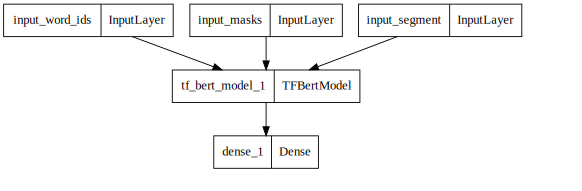

In [ ]:
#SVG(model_to_dot(create_sentiment_bert(), dpi = 65).create(prog='dot', format='svg'))

## 훈련 및 성능 검증

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [ ]:
# TPU 실행 시 
if TPU:
  strategy = tf.distribute.experimental.TPUStrategy(resolver)
# 함수를 strategy.scope로 묶어 줌
  with strategy.scope():
    sentiment_model = create_sentiment_bert()
  
  sentiment_model.fit(train_x, train_y, epochs=10, shuffle=True, batch_size=100, validation_data=(test_x, test_y),callbacks=[es]) #
else:
  # GPU 모드로 훈련시킬 때
  sentiment_model = create_sentiment_bert()
  
  sentiment_model.fit(train_x, train_y, epochs=4, shuffle=False, batch_size=100, validation_data=(test_x, test_y))

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'cond/Identity_16:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'cond/Identity_24:0' shape=(None,) dtype=int64>]
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'cond/Identity_16:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'cond/Identity_24:0' shape=(None,) dtype=int64>]


251/251 [==============================] - ETA: 0s - loss: 0.4479 - accuracy: 0.8055

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'cond/Identity_16:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'cond/Identity_24:0' shape=(None,) dtype=int64>]


251/251 [==============================] - 209s 406ms/step - loss: 0.4479 - accuracy: 0.8055 - val_loss: 0.2229 - val_accuracy: 0.9239
Epoch 2/10
251/251 [==============================] - 33s 133ms/step - loss: 0.1905 - accuracy: 0.9322 - val_loss: 0.1757 - val_accuracy: 0.9336
Epoch 3/10
251/251 [==============================] - 33s 133ms/step - loss: 0.1549 - accuracy: 0.9435 - val_loss: 0.1572 - val_accuracy: 0.9395
Epoch 4/10
251/251 [==============================] - 33s 133ms/step - loss: 0.1300 - accuracy: 0.9524 - val_loss: 0.1537 - val_accuracy: 0.9414
Epoch 5/10
251/251 [==============================] - 33s 133ms/step - loss: 0.1088 - accuracy: 0.9597 - val_loss: 0.1499 - val_accuracy: 0.9422
Epoch 6/10
251/251 [==============================] - 33s 133ms/step - loss: 0.0900 - accuracy: 0.9673 - val_loss: 0.1463 - val_accuracy: 0.9454
Epoch 7/10
251/251 [==============================] - 33s 133ms/step - loss: 0.0723 - accuracy: 0.9743 - val_loss: 0.1692 - val_accuracy: 0.

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)

훈련한 모델을 path에 저장
path는 임의로 지정해 주세요

In [ ]:
from keras import Input, Model
from sklearn.metrics import classification_report

In [ ]:
def get_feature_map(sentiment_model):
  inputs = sentiment_model.input
  outputs =sentiment_model.layers[-2].output
  feature_model = Model(inputs, outputs)
  return feature_model

In [ ]:
bert_feature = get_feature_map(sentiment_model)

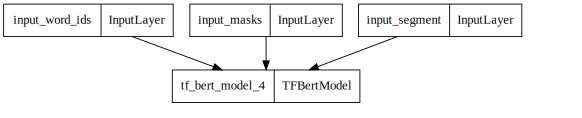

In [ ]:
SVG(model_to_dot(bert_feature, dpi = 65).create(prog='dot', format='svg'))

#경로저장

In [ ]:
# PATH는 임의로 지정

path = "gdrive/My Drive/"

In [ ]:
sentiment_model.save_weights(path+"/huggingface_bert(최종)대표청구항.h5")

In [ ]:
sentiment_model = create_sentiment_bert()
sentiment_model.load_weights(path+"/huggingface_bert요약.h5")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


훈련 모델의 예측 성능을 F1 SCORE로 체크하기 위한 작업

#데이터 로드

In [ ]:
def predict_convert_data(data_df):
    global tokenizer
    tokens, masks, segments = [], [], []
    
    for i in tqdm(range(len(data_df))):

        token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, truncation=True, padding='max_length')
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        segment = [0]*SEQ_LEN

        tokens.append(token)
        segments.append(segment)
        masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def predict_load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_x = predict_convert_data(data_df)
    return data_x

test 데이터 예측하기

In [ ]:
test_set = predict_load_data(test)

100%|██████████| 10723/10723 [00:57<00:00, 186.59it/s]


In [ ]:
test_set[0:3][1]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

#피쳐 추출

In [ ]:
bert_weight_list = bert_feature.predict(test_set)

In [ ]:
bert_weight_list2=bert_weight_list[1]

In [ ]:
bert_weight_list2

NameError: ignored

#차원축소(T-SNE)

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
bert_embedded = TSNE(n_components=2).fit_transform(bert_weight_list2)

#UMAP

In [ ]:
!pip uninstall umap
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 7.6 MB/s 
     |████████████████████████████████| 1.1 MB 82.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=68c399c4c494461a7d5ebcbf30dc13e0cf050bed0c1a5e38a603b496c313e963
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=dbae1b3863e1f17006a5aa73306d603173140850a35d590225eedaaf698ef5b3
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
import umap.umap_ as umap

In [ ]:
reducer = umap.UMAP(n_neighbors=2,min_dist=0.0001,metric='manhattan') 
embedding = reducer.fit_transform(bert_weight_list2)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/usr/local/lib/python3.7/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


In [ ]:
q=pd.DataFrame(embedding)
q.to_csv("/content/gdrive/MyDrive/(요약)2차원 manhattan2.csv")

In [ ]:
import matplotlib.pyplot as plt

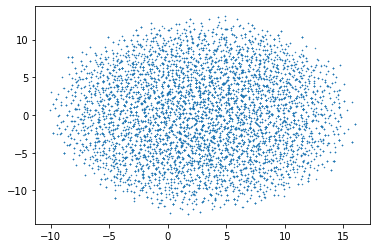

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1)

In [ ]:
test_set

#점수 보기

In [ ]:
#TPU를 사용하기 위해서
with strategy.scope():
  preds = sentiment_model.predict(test_set)

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'cond/Identity_16:0' shape=(None, 128) dtype=int64>]


In [ ]:
# 부정이면 0, 긍정이면 1 출력
preds

array([[0.99820524],
       [0.99808115],
       [0.9982308 ],
       ...,
       [0.00174478],
       [0.0018113 ],
       [0.00174931]], dtype=float32)

In [ ]:
import pandas as pd

In [ ]:
q=pd.DataFrame(preds)
q.to_csv("/content/gdrive/MyDrive/예측데이터(대표청구항)2차분류2.csv")

In [ ]:
q.to_csv("/content/gdrive/MyDrive/18만데이터예측(요약).csv")

우리가 훈련한 모델을 F1 SCORE를 바탕으로 성능 측정  
F1 SCORE는 precision과 recall을 가중평균하여 계산합니다  
recall은 (모델이 TRUE라고 판정한 것의 숫자)/(전체 TRUE의 숫자)  
precision은 (진짜 TRUE) / (모델이 TRUE라고 판정한 것의 숫자)

In [ ]:
from sklearn.metrics import classification_report
y_true = test['label']
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      6429
           1       0.91      0.95      0.93      4294

    accuracy                           0.94     10723
   macro avg       0.94      0.94      0.94     10723
weighted avg       0.94      0.94      0.94     10723



In [ ]:
import logging
tf.get_logger().setLevel(logging.ERROR)

# 실제 데이터로 실습하기

문장 하나 하나를 가지고 실제로 분류해보도록 하겠습니다.  

In [ ]:
def sentence_convert_data(data):
    global tokenizer
    tokens, masks, segments = [], [], []
    token = tokenizer.encode(data, max_length=SEQ_LEN, truncation=True, padding='max_length')
    
    num_zeros = token.count(0) 
    mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros 
    segment = [0]*SEQ_LEN

    tokens.append(token)
    segments.append(segment)
    masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

def movie_evaluation_predict(sentence):
    data_x = sentence_convert_data(sentence)
    predict = sentiment_model.predict(data_x)
    predict_value = np.ravel(predict)
    predict_answer = np.round(predict_value,0).item()
    
    if predict_answer == 0:
      print("(부정 확률 : %.2f) 부정적인 영화 평가입니다." % (1-predict_value))
    elif predict_answer == 1:
      print("(긍정 확률 : %.2f) 긍정적인 영화 평가입니다." % predict_value)

In [ ]:
indata=alldata['document']

In [ ]:
sentiment_model.predict(indata[0])

IndexError: ignored

In [ ]:
sentence_convert_data(input1)

ValueError: ignored

In [ ]:
for i range(indata):
  

In [ ]:
movie_evaluation_predict(indata)

ValueError: ignored

In [ ]:
movie_evaluation_predict("A web server based system for 24/7 managed care services to clients with Alzheimer, Autism, and assisted living is provided in the invention. The system uses intelligent digital camera with built in AI algorithms to monitor client's activities, uses voice recognition, and two way voice communication and thus requires no body wearing devices. The camera detects client's movements—such as sitting, lying, and falls—and generates appropriate alarms to a central server for a client assistance operator to act. The smarts in the camera can analyze client's vicinity to pre stored scenes, client's emotion and generate alerts to the client assistant operator. The system uses an intelligent digital client assistant device with built in smarts for speaker independent voice recognition to provide client access to entertainment, e-commerce, and other voice activated services. The system in the invention uses a drone to monitor remotely movement of the client in case it leaves premises without informing a caregiver. The drone pilot monitors the movement and informs local authority to assist the client. The web server allows all managed care services needed to provide a good quality of life to the clients while monitoring their well-being and safety and relieves burden on the caregiver. The system in the invention allows clients remote virtual office visit to a physician, and monitors client's vehicle movement if client drives away from home. The system can also be used in other security related applications.")

(긍정 확률 : 0.98) 긍정적인 영화 평가입니다.


In [ ]:
movie_evaluation_predict("남친이 이 영화를 보고 헤어지자고한 영화. 자유롭게 살고 싶다고 한다. 내가 무슨 나비를 잡은 덫마냥 나에겐 다시 보고싶지 않은 영화.")

(부정 확률 : 0.99) 부정적인 영화 평가입니다.


In [ ]:
input1 = pd.read_csv("/content/gdrive/MyDrive/dong.csv",encoding="cp949")

In [ ]:
input2 = pd.read_csv("/content/gdrive/MyDrive/inputdata2.csv",encoding="cp949")

In [ ]:
a=predict_load_data(input1)

100%|██████████| 3206/3206 [00:07<00:00, 430.72it/s]


In [ ]:
b = sentiment_model.predict(a)

In [ ]:
q=pd.DataFrame(b)
q.to_csv("증강형.csv")

In [ ]:
from sklearn.metrics import classification_report
y_true = input2['label']
# F1 Score 확인
print(classification_report(y_true, np.round(b,0)))

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      3208
         1.0       0.00      0.00      0.00         0

    accuracy                           0.79      3208
   macro avg       0.50      0.40      0.44      3208
weighted avg       1.00      0.79      0.88      3208



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

In [ ]:
SVG(model_to_dot(create_sentiment_bert(), dpi = 65).create(prog='dot', format='svg'))